## Import

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.iolib.table import SimpleTable


## Read dataset

In [224]:
dataset = pd.read_csv("input/DailyDelhiClimateTrain.csv", index_col='date', dayfirst=True)
df = pd.DataFrame(dataset)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [225]:
hum = dataset.humidity
hum.head()

date
2013-01-01    84.500000
2013-01-02    92.000000
2013-01-03    87.000000
2013-01-04    71.333333
2013-01-05    86.833333
Name: humidity, dtype: float64

<Axes: xlabel='date'>

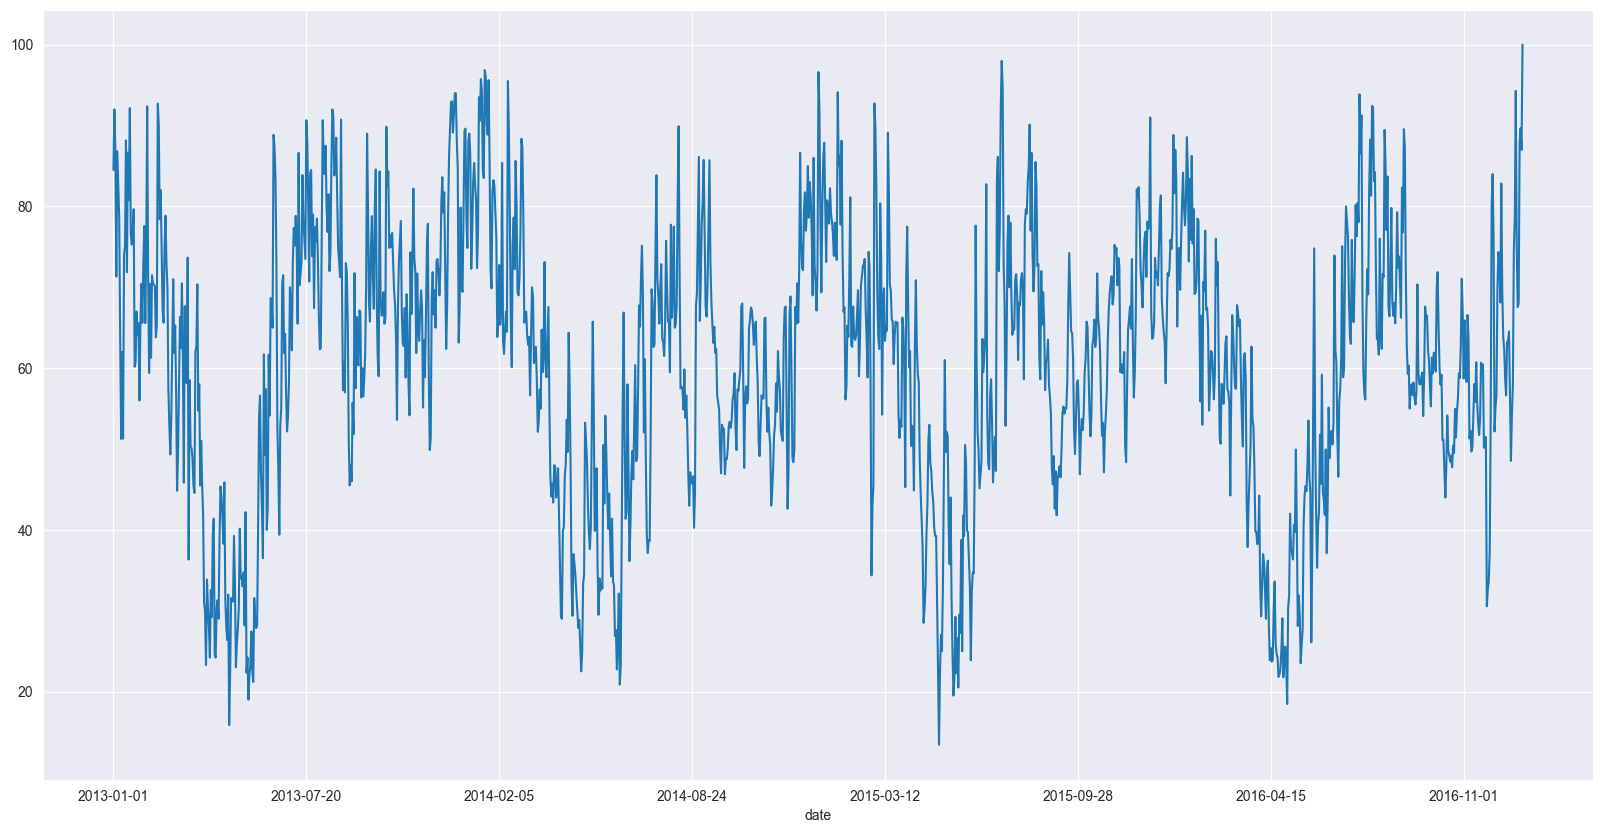

In [226]:
hum.plot(figsize=(20,10))

<bound method NDFrame.describe of date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64>

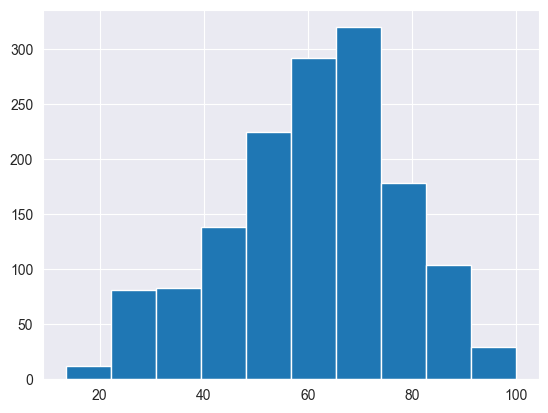

In [227]:
result = hum.describe
hum.hist()
result

In [228]:
row =  [u'JB', u'p-value', u'Skewness', u'Kurtosis']
jb_test = sm.stats.stattools.jarque_bera(hum)
a = np.vstack([jb_test])
testResult = SimpleTable(a, row)
print(testResult)

        JB               p-value               Skewness            Kurtosis    
-------------------------------------------------------------------------------
34.74158280413825 2.8573349132677248e-08 -0.34362423369234935 2.686946003245399
-------------------------------------------------------------------------------


In [229]:
test = sm.tsa.stattools.adfuller(hum)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -3.675576919163342
p-value:  0.00447010047813071
Critical values:  {'1%': -3.434880391815318, '5%': -2.8635408625359315, '10%': -2.5678352438452814}
единичных корней нет, ряд стационарен


## Count of duplicate and NaN values

In [230]:
dup = dataset.duplicated().sum()
print('Any Duplicate Value:',dup)
dataset.isnull().sum()

Any Duplicate Value: 0


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64